In [0]:
# pip install twitterscraper==1.1.0

from twitterscraper import query_tweets
import datetime as dt
from time import sleep   # 무분별한 스크래이핑을 제어하기 위해 1 ~ 2초 간격을 둠

import re
import matplotlib.pyplot as plt 

from collections import Counter
from wordcloud import WordCloud

# pip install konlpy
import konlpy
from konlpy.tag import Okt

import numpy as np
from PIL import Image

from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator


In [17]:
if __name__ == '__main__':
    
    total = 0   # 수집한 트윗 총 건수
    fname = 'lineage1.txt'

    file = open(fname, 'ab')   
    
    for tweet in query_tweets('리니지', 50,
                              begindate=dt.date(2019, 6, 15), 
                              enddate=dt.date(2019, 7, 15)): 
        file.write(str(tweet.timestamp).encode())   
        file.write(tweet.text.encode('utf-8'))
        
        total += 1   # 트윗을 파일에 저장시 카운트 증가
        sleep(1)   # 1초 동안 트윗 수집 잠시 중지
    
    file.close()
    
    print('수집한 트윗수', total)
   

INFO: queries: ['리니지 since:2019-06-15 until:2019-06-16', '리니지 since:2019-06-16 until:2019-06-18', '리니지 since:2019-06-18 until:2019-06-19', '리니지 since:2019-06-19 until:2019-06-21', '리니지 since:2019-06-21 until:2019-06-22', '리니지 since:2019-06-22 until:2019-06-24', '리니지 since:2019-06-24 until:2019-06-25', '리니지 since:2019-06-25 until:2019-06-27', '리니지 since:2019-06-27 until:2019-06-28', '리니지 since:2019-06-28 until:2019-06-30', '리니지 since:2019-06-30 until:2019-07-01', '리니지 since:2019-07-01 until:2019-07-03', '리니지 since:2019-07-03 until:2019-07-04', '리니지 since:2019-07-04 until:2019-07-06', '리니지 since:2019-07-06 until:2019-07-07', '리니지 since:2019-07-07 until:2019-07-09', '리니지 since:2019-07-09 until:2019-07-10', '리니지 since:2019-07-10 until:2019-07-12', '리니지 since:2019-07-12 until:2019-07-13', '리니지 since:2019-07-13 until:2019-07-15']
INFO: Querying 리니지 since:2019-06-15 until:2019-06-16
INFO: Querying 리니지 since:2019-06-16 until:2019-06-18
INFO: Querying 리니지 since:2019-06-22 until:2019-06-24
INFO:

수집한 트윗수 394


In [18]:
if __name__ == '__main__':
    
    total = 0   # 수집한 트윗 총 건수
    fname = 'lineage2.txt'

    file = open(fname, 'ab')   
    
    for tweet in query_tweets('현질', 50,
                              begindate=dt.date(2019, 6, 15), 
                              enddate=dt.date(2019, 7, 15)): 
        file.write(str(tweet.timestamp).encode())   
        file.write(tweet.text.encode('utf-8'))
        
        total += 1   # 트윗을 파일에 저장시 카운트 증가
        sleep(1)   # 1초 동안 트윗 수집 잠시 중지
    
    file.close()
    
    print('수집한 트윗수', total)
    


INFO: queries: ['현질 since:2019-06-15 until:2019-06-16', '현질 since:2019-06-16 until:2019-06-18', '현질 since:2019-06-18 until:2019-06-19', '현질 since:2019-06-19 until:2019-06-21', '현질 since:2019-06-21 until:2019-06-22', '현질 since:2019-06-22 until:2019-06-24', '현질 since:2019-06-24 until:2019-06-25', '현질 since:2019-06-25 until:2019-06-27', '현질 since:2019-06-27 until:2019-06-28', '현질 since:2019-06-28 until:2019-06-30', '현질 since:2019-06-30 until:2019-07-01', '현질 since:2019-07-01 until:2019-07-03', '현질 since:2019-07-03 until:2019-07-04', '현질 since:2019-07-04 until:2019-07-06', '현질 since:2019-07-06 until:2019-07-07', '현질 since:2019-07-07 until:2019-07-09', '현질 since:2019-07-09 until:2019-07-10', '현질 since:2019-07-10 until:2019-07-12', '현질 since:2019-07-12 until:2019-07-13', '현질 since:2019-07-13 until:2019-07-15']
INFO: Querying 현질 since:2019-06-21 until:2019-06-22
INFO: Querying 현질 since:2019-06-27 until:2019-06-28
INFO: Querying 현질 since:2019-06-25 until:2019-06-27
INFO: Querying 현질 since:2019

수집한 트윗수 359


In [0]:
f = open(r'lineage1.txt', encoding='utf-8')
lineage1 = f.read()


f = open(r'lineage2.txt', encoding='utf-8')
lineage2 = f.read()

In [0]:
# 명사추출 및 출현 빈도 파악

twitter = Okt()
nouns1 = twitter.nouns(lineage1)
nouns1[:10]

nouns2 = twitter.nouns(lineage2)
nouns2[:10]

# 불용어 처리
# 금칙어, 광고문자 제거 후 2자이상만 추출

words1 = []
words2 = []
stopword = '진짜|해도'


for i in range(len(nouns1)):
    nouns1[i] = re.sub(stopword, '', nouns1[i])
    # 추출된 명사에 stopword 가 있으면 ''(빈문자) 로 바꿈
    
    if len(nouns1[i]) >= 2:
        words1.append(nouns1[i])
    # 문자 길이가 2자 이상이면 words 리스트에 추가

    
wc1 = Counter(words1)
wc1 = dict(wc1.most_common())




for i in range(len(nouns2)):
    nouns2[i] = re.sub(stopword, '', nouns2[i])
    # 추출된 명사에 stopword 가 있으면 ''(빈문자) 로 바꿈
    
    if len(nouns2[i]) >= 2:
        words2.append(nouns2[i])
    # 문자 길이가 2자 이상이면 words 리스트에 추가

    
wc2 = Counter(words2)
wc2 = dict(wc2.most_common())


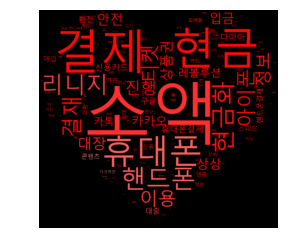

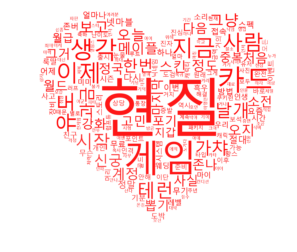

In [35]:
# 워드클라우드 시각화

mask_path = r'h.jpg'   # 투명성 없는 파일

mask = np.array(Image.open(mask_path))
# 배경 이미지 파일을 numpy 배열로 변환



fontpath = r'malgun.ttf'
wcimg1 = WordCloud(font_path=fontpath,
                   mask=mask,
                   background_color='black', 
                   width=800, height=600).generate_from_frequencies(wc1)

plt.imshow(wcimg1.recolor(color_func=img_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

fontpath = r'malgun.ttf'
wcimg2 = WordCloud(font_path=fontpath,
                   mask=mask,
                   mode='RGBA',
                   background_color='white', 
                   width=800, height=600).generate_from_frequencies(wc2)

plt.imshow(wcimg2.recolor(color_func=img_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

